In [1]:
from collections import defaultdict
import io
import string
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parse_line(line):
    values = line.strip().split(' +++$+++ ')
    columns = ['movie_id', 'title', 'release_year', 'rating', 'num_votes', 'genres']
    metadata = dict(zip(columns, values))
    
    metadata['release_year'] = int(metadata['release_year'])
    metadata['rating'] = float(metadata['rating']) 
    metadata['num_votes'] = int(metadata['num_votes'])  
    
    exclude = set(string.punctuation)
    genres = ''.join(ch for ch in metadata['genres'] if ch not in exclude).split()
    metadata['genres'] = genres
    return metadata

In [14]:
metadataMovies = defaultdict(dict)
moviesPerGenre = defaultdict(list)
ratingsPerGenre = defaultdict(list)
watchersPerGenre = defaultdict(int)
lines = io.open('cornell/movie_titles_metadata.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    metadata = parse_line(line)
    metadataMovies[metadata['movie_id']] = metadata
    for genre in metadata['genres']:
        moviesPerGenre[genre].append(metadata['movie_id'])
        ratingsPerGenre[genre].append(metadata['rating'])
        watchersPerGenre[genre] += metadata['num_votes']       

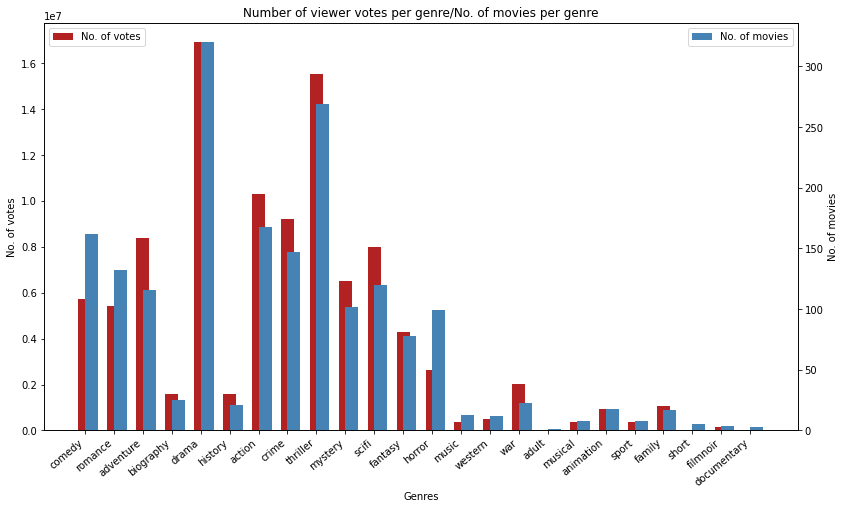

In [40]:
# Distribution of movie genres
genres = [genre for genre in moviesPerGenre]
movies_per_genre = [len(moviesPerGenre[g]) for g in moviesPerGenre]

fig, ax1 = plt.subplots()
ax1.set_title('Number of viewer votes per genre/No. of movies per genre')
ax1.set_xlabel('Genres')
ax1.bar(genres, watchersPerGenre.values(), color='firebrick', 
        width=0.45, align='center', label='No. of votes')
ax1.set_ylabel('No. of votes')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(genres, movies_per_genre, color='steelblue', 
        width=0.45, align='edge', label='No. of movies')
ax2.set_ylabel('No. of movies')
plt.legend(loc='upper right')

plt.setp(ax1.get_xticklabels(), rotation=40, horizontalalignment='right')
fig.set_size_inches(13.5, 7.5)
plt.show()



In [16]:
# Co-occurence of genres

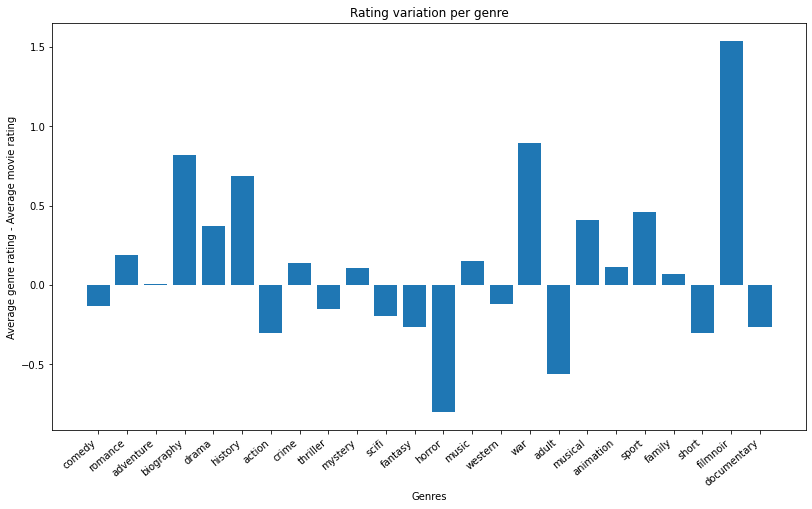

In [8]:
# Average rating per genre
all_ratings = [metadataMovies[m]['rating'] for m in metadataMovies]
mean_rating = np.mean(all_ratings)
rating_variation_per_genre = [np.mean(ratingsPerGenre[g]) - mean_rating for g in ratingsPerGenre]

fig, ax = plt.subplots()
ax.set_title('Rating variation per genre')
ax.bar(genres, rating_variation_per_genre)
ax.set_xlabel('Genres')
ax.set_ylabel('Average genre rating - Average movie rating')
plt.setp(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
fig.set_size_inches(13.5, 7.5)
plt.show()

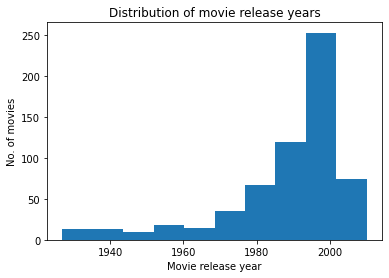

In [12]:
# Distribution of movie release years
movie_release_years = [metadataMovies[m]['release_year'] for m in metadataMovies]

plt.title('Distribution of movie release years')
plt.hist(movie_release_years)
plt.xlabel('Movie release year')
plt.ylabel('No. of movies')
plt.show()

In [7]:
movieCharacters = defaultdict(list)
lines = io.open('cornell/movie_characters_metadata.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    values = line.strip().split(' +++$+++ ')
    movieCharacters[values[2]].append(values[1].strip())

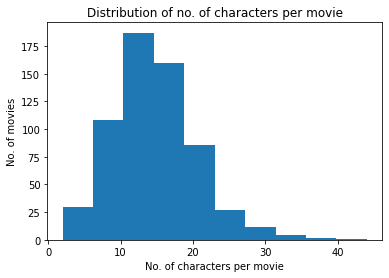

In [8]:
# Distribution of number characters per movie
num_characters_per_movie = [len(movieCharacters[m]) for m in movieCharacters] 

plt.title('Distribution of no. of characters per movie')
plt.hist(num_characters_per_movie)
plt.xlabel('No. of characters per movie')
plt.ylabel('No. of movies')
plt.show()

In [9]:
lineMapping = defaultdict()
lines = io.open('cornell/movie_lines.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    values = line.strip().split(' +++$+++ ')
    if len(values) == 5:
        lineMapping[values[0]] = values[4]
    else:
        lineMapping[values[0]] = ''

In [10]:
import ast
conversationMovieMapping = defaultdict(list)
conversations = []
lines = io.open('cornell/movie_conversations.txt',mode='r', encoding='latin-1').readlines()
for line in lines:
    values = line.strip().split(' +++$+++ ')
    conv = [n.strip() for n in ast.literal_eval(values[3])]
    conversationForMovie = [lineMapping[x] for x in conv]
    conversations.append((conversationForMovie, values[2]))
    conversationMovieMapping[values[2]].append(conversationForMovie)    

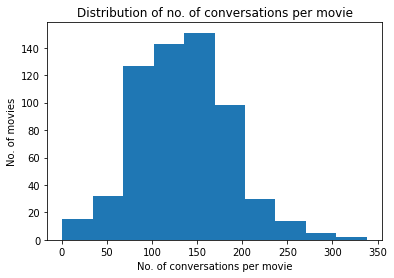

In [11]:
# Distribution of number of coversations per movie
num_conv_per_movie = [len(conversationMovieMapping[m]) for m in conversationMovieMapping] 

plt.title('Distribution of no. of conversations per movie')
plt.hist(num_conv_per_movie)
plt.xlabel('No. of conversations per movie')
plt.ylabel('No. of movies')
plt.show()

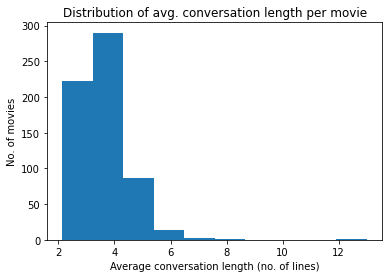

In [12]:
# Distribution of average conversation length per movie
conversation_lengths = {m:[len(conv) for conv in conversationMovieMapping[m]] for m in conversationMovieMapping}
average_conv_length = [np.mean(conversation_lengths[m]) for m in conversation_lengths]

plt.title('Distribution of avg. conversation length per movie')
plt.hist(average_conv_length)
plt.xlabel('Average conversation length (no. of lines)')
plt.ylabel('No. of movies')
plt.show()

In [13]:
completeDataset = open('completeDataset.txt','w+')
for mov in metadataMovies:
    line = mov + ' +++$+++ '
    line += ' +++$+++ '.join(metadataMovies[mov])
    line += ' +++$+++ '
    if len(movieCharacters[mov]) > 0:
        line += str(movieCharacters[mov])
    else:
        line += 'N/A'
    line += ' +++$+++ '
    if len(conversationMovieMapping[mov]) > 0:
        line += str(conversationMovieMapping[mov])
    else:
        line += 'N/A'
    
    line += '\n'
    
    completeDataset.write(line)
completeDataset.close()

In [14]:
mapping = defaultdict()
for line in open('completeDataset.txt','r'):
    values = line.split(' +++$+++ ')
    mapping[values[0]] = values[1:]
    
count = 0
for key in mapping:
    print(key)
    print(mapping[key])
    print(len(mapping[key]))
    break

m0
['movie_id', 'title', 'release_year', 'rating', 'num_votes', 'genres', "['BIANCA', 'BRUCE', 'CAMERON', 'CHASTITY', 'JOEY', 'KAT', 'MANDELLA', 'MICHAEL', 'MISS PERKY', 'PATRICK', 'SHARON', 'WALTER']", '[[\'Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.\', "Well, I thought we\'d start with pronunciation, if that\'s okay with you.", \'Not the hacking and gagging and spitting part.  Please.\', "Okay... then how \'bout we try out some French cuisine.  Saturday?  Night?"], ["You\'re asking me out.  That\'s so cute. What\'s your name again?", \'Forget it.\'], ["No, no, it\'s my fault -- we didn\'t have a proper introduction ---", \'Cameron.\', "The thing is, Cameron -- I\'m at the mercy of a particularly hideous breed of loser.  My sister.  I can\'t date until she does.", \'Seems like she could get a date easy enough...\'], [\'Why?\', \'Unsolved mystery.  She used to be really popular when she started hi

In [15]:
dataset = []
for m in metadataMovies:
    data = {}
    data[m] = metadataMovies[m].copy()
    data[m]['characters'] = movieCharacters[m]
    data[m]['conversations'] = conversationMovieMapping[m]
    dataset.append(data)
    
with open('conversation_dataset.json', 'w') as f:
    json.dump(dataset , f)

In [16]:
with open("conversation_dataset.json", "r") as f:
    dataset = json.load(f)
print(dataset[:5])

[{'m0': {'movie_id': 'm0', 'title': '10 things i hate about you', 'release_year': 1999, 'rating': 6.9, 'num_votes': 62847, 'genres': ['comedy', 'romance'], 'characters': ['BIANCA', 'BRUCE', 'CAMERON', 'CHASTITY', 'JOEY', 'KAT', 'MANDELLA', 'MICHAEL', 'MISS PERKY', 'PATRICK', 'SHARON', 'WALTER'], 'conversations': [['Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.', "Well, I thought we'd start with pronunciation, if that's okay with you.", 'Not the hacking and gagging and spitting part.  Please.', "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?"], ["You're asking me out.  That's so cute. What's your name again?", 'Forget it.'], ["No, no, it's my fault -- we didn't have a proper introduction ---", 'Cameron.', "The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.", 'Seems like she could get a date easy enou